Q 01 == Predicting Delivery Time Using Sorting Time.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/DS Data Sets/Simple Linear Regression/delivery_time.csv')

In [7]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [10]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [14]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [16]:
df[df.duplicated()]

,Delivery Time,Sorting Time


In [12]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<Axes: xlabel='Delivery Time', ylabel='Density'>

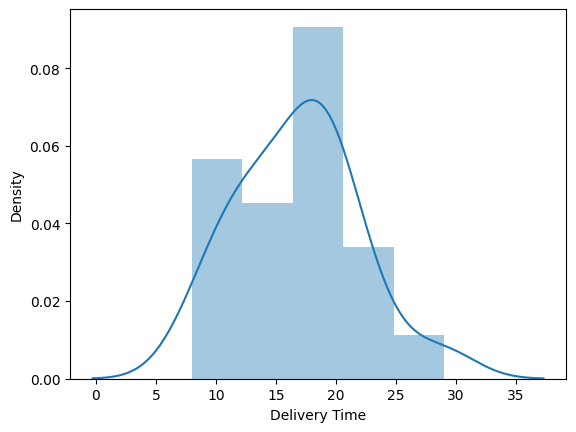

In [17]:
#plotting
sns.distplot(df['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

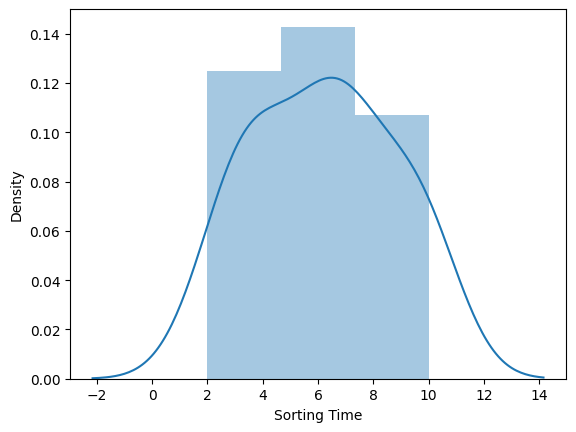

In [19]:
sns.distplot(df['Sorting Time'])

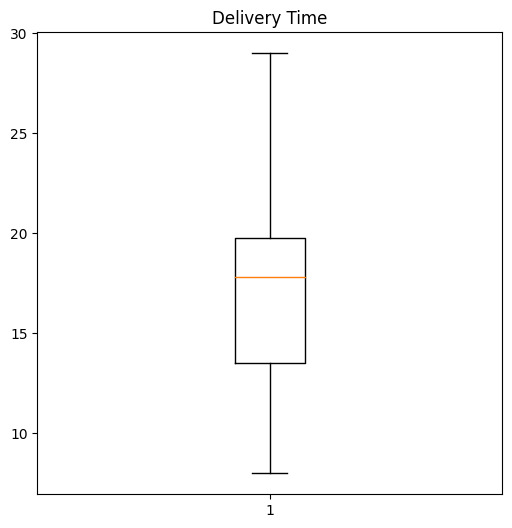

In [20]:
#boxplot Delivery Time
plt.subplots(figsize = (6,6))
plt.boxplot(df['Delivery Time'])
plt.title('Delivery Time')
plt.show()

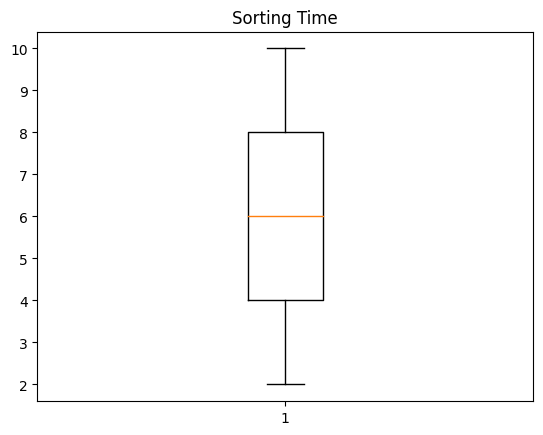

In [21]:
# boxplot Sorting Time
plt.boxplot(df['Sorting Time'])
plt.title('Sorting Time')
plt.show()

In [22]:
# corelation
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [23]:
# renaming columns
df = df.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'}, axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [25]:
import seaborn as sns

In [27]:
df.columns

Index(['delivery_time', 'sorting_time'], dtype='object')

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

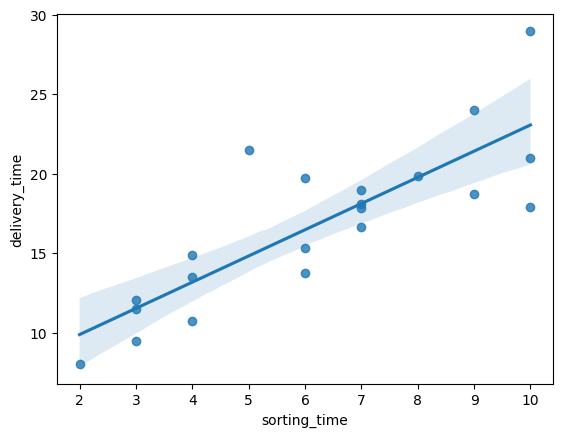

In [28]:
# regression plot

sns.regplot(x=df['sorting_time'],y=df['delivery_time'])

In [29]:
df.var()

delivery_time    25.754619
sorting_time      6.461905
dtype: float64

In [35]:
import statsmodels.formula.api as smf

In [37]:
# model building
model = smf.ols("delivery_time~sorting_time",data=df).fit()



In [39]:
# finding coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [40]:
# finding t_values and p_values
model.tvalues, model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [41]:
# fiding rsquared values
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [44]:
# predictions
# for say sorting time 6, 8
df2 = pd.Series([6,8])
df2

0    6
1    8
dtype: int64

In [45]:
df_pred=pd.DataFrame(df2,columns=['sorting_time'])
df_pred

,sorting_time
0,6
1,8


In [46]:
model.predict(df_pred)

0    16.476853
1    19.774893
dtype: float64

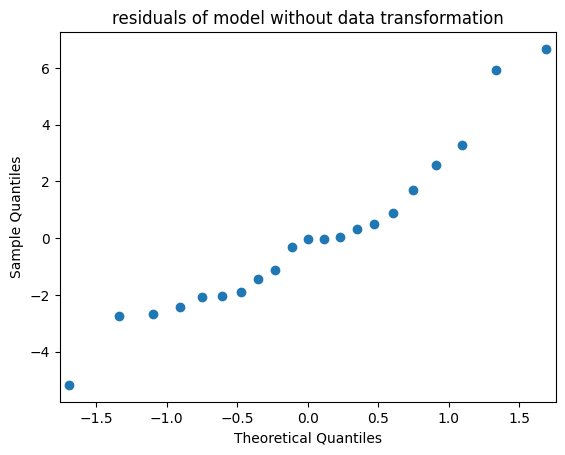

In [48]:
# residual analysis
import statsmodels.api as sm
sm.qqplot(model.resid)
plt.title('residuals of model without data transformation')
plt.show()